# Model Training with different outliers included

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

### Import different csv versions of the data

In [2]:
# Create dataframe list with valid to use dataframes
dataframe_final = pd.read_csv("CurrentData/listings_final.csv")
dataframe_no_nan = pd.read_csv("CurrentData/listings_no_nan.csv")

dataframe_01p = pd.read_csv("CurrentData/listings_01p.csv")
dataframe_02p = pd.read_csv("CurrentData/listings_02p.csv")
dataframe_05p = pd.read_csv("CurrentData/listings_05p.csv")
dataframe_1p = pd.read_csv("CurrentData/listings_1p.csv")
dataframe_2p = pd.read_csv("CurrentData/listings_2p.csv")

dataframe_01p_upper = pd.read_csv("CurrentData/listings_01p_upper.csv")
dataframe_02p_upper = pd.read_csv("CurrentData/listings_02p_upper.csv")
dataframe_05p_upper = pd.read_csv("CurrentData/listings_05p_upper.csv")
dataframe_1p_upper = pd.read_csv("CurrentData/listings_1p_upper.csv")
dataframe_2p_upper = pd.read_csv("CurrentData/listings_2p_upper.csv")

dataframe_3p_upper = pd.read_csv("CurrentData/listings_3p_upper.csv")

dataframe_specific = pd.read_csv("CurrentData/listings_specific.csv")


dataframe_list = [
    dataframe_final, # index 0
    dataframe_no_nan, # index 1
    dataframe_01p, dataframe_02p, dataframe_05p, dataframe_1p, dataframe_2p, # index 2-6
    dataframe_01p_upper, dataframe_02p_upper, dataframe_05p_upper, dataframe_1p_upper, dataframe_2p_upper, # index 7-11
    dataframe_3p_upper, # index 12
    dataframe_specific # index 13
]
#dataframe_index = 0

dataframe_name_list = [
    "minus extreme upper outliers", 
    "all outliers", 
    "minus outer 0.1%", "minus outer 0.2%", "minus outer 0.5%", "minus outer 1%", "minus outer 2%",
    "minus upper 0.1%", "minus upper 0.2%", "minus upper 0.5%", "minus upper 1%", "minus upper 2%", 
    "minus upper 3%",
    "minus specific ids"
]

### Create train, validation, test - split

In [3]:
random_state = [42, 10, 2, 55]
random_state_index = 0

dataframe_splits_list = []

for dataframe in dataframe_list:
    # Perform splits: 20% test, 0.8*80% train, 0.2*80% validation
    df_train, df_test = train_test_split(dataframe, test_size = 0.2, random_state = random_state[random_state_index], shuffle = True)
    df_train, df_validation = train_test_split(df_train, test_size = 0.2, random_state = random_state[random_state_index], shuffle = True)

    dataframe_splits_list.append((df_train, df_validation, df_test))

print(len(dataframe_splits_list))


14


In [4]:
# For debugging in columns notebook, to insure that the splits are the same -> everything worked the same
#df_train_debugging = dataframe_splits_list[10][0]
#print("For debugging")
#print(df_train_debugging.iloc[:3, :6])

### Split data into feature dataframe, and target df/ pd series

<div style="font-size: 1.2em; font-weight: 500;">
Removing outliers from the training set, but keeping them in the test and validation sets has been tested and did increase the MSE and will not be done here after all.
</div>

In [5]:
# Print shapes of all the different splits
index_counter = 0
for tuple in dataframe_splits_list:
    df_train, df_validation, df_test = tuple
    print(index_counter, df_train.shape, df_test.shape, df_validation.shape)
    index_counter += 1

#print(df_train_default.shape)

0 (5689, 303) (1778, 303) (1423, 303)
1 (5694, 303) (1780, 303) (1424, 303)
2 (5684, 303) (1777, 303) (1421, 303)
3 (5674, 303) (1774, 303) (1419, 303)
4 (5642, 303) (1764, 303) (1411, 303)
5 (5588, 303) (1747, 303) (1398, 303)
6 (5469, 303) (1710, 303) (1368, 303)
7 (5688, 303) (1778, 303) (1423, 303)
8 (5683, 303) (1776, 303) (1421, 303)
9 (5665, 303) (1771, 303) (1417, 303)
10 (5637, 303) (1762, 303) (1410, 303)
11 (5580, 303) (1744, 303) (1396, 303)
12 (5524, 303) (1727, 303) (1381, 303)
13 (5681, 303) (1776, 303) (1421, 303)


In [6]:
def split_dataframe_Xy(df_train, df_validation, df_test):
    # Split dataframe into features and target
    X_train = df_train.drop(columns=["price"])
    y_train = df_train["price"] # Note: is now a pandas series, not a dataframe
    X_test = df_test.drop(columns=["price"])
    y_test = df_test["price"] # Note: -//-
    X_validation = df_validation.drop(columns=["price"])
    y_validation = df_validation["price"] # Note: -//-

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [7]:
# Split dataframes into feautures and target via function
dataframe_ft_splits_list = []

for tuple in dataframe_splits_list:
    X_train, y_train, X_validation, y_validation, X_test, y_test = split_dataframe_Xy(*tuple)
    dataframe_ft_splits_list.append((X_train, y_train, X_validation, y_validation, X_test, y_test))

<div style="font-size: 1.2em; font-weight: 500;">
dataframe_ft_splits_list is now a list of tupels, where each tuple corresponds to one csv file. Each tuple contains 6 dataframes: Target and feature dataframes of each train data, validation data and test data.
</div>

In [8]:
# Check column names
tuple = dataframe_ft_splits_list[10]
X_train, _, _, _, _, _ = tuple
print(X_train.columns)
print(X_train.columns[9])

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bathrooms',
       ...
       'neighbourhood_group_cleansed_Lichtenberg',
       'neighbourhood_group_cleansed_Marzahn - Hellersdorf',
       'neighbourhood_group_cleansed_Mitte',
       'neighbourhood_group_cleansed_Neukölln',
       'neighbourhood_group_cleansed_Pankow',
       'neighbourhood_group_cleansed_Reinickendorf',
       'neighbourhood_group_cleansed_Spandau',
       'neighbourhood_group_cleansed_Steglitz - Zehlendorf',
       'neighbourhood_group_cleansed_Tempelhof - Schöneberg',
       'neighbourhood_group_cleansed_Treptow - Köpenick'],
      dtype='object', length=302)
bathrooms


### Normalize data

In [9]:
def normalize(X_train, X_validation, X_test):
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) # fit mean and std of train data features onto scaler and normalize train data
    X_test_scaled = scaler.transform(X_test)  # Use same mean and std to normalize test data features
    X_validation_scaled = scaler.transform(X_validation) # -//- validation data features

    return X_train_scaled, X_test_scaled, X_validation_scaled


In [10]:
# Normalize all the feature data (using the function)
dataframe_ft_splits_scaled_list = []

for tuple in dataframe_ft_splits_list:
    X_train, y_train, X_validation, y_validation, X_test, y_test = tuple 
    X_train_scaled, X_test_scaled, X_validation_scaled = normalize(X_train, X_validation, X_test)
    tuple_scaled = (X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test)
    dataframe_ft_splits_scaled_list.append(tuple_scaled)

print(len(dataframe_ft_splits_scaled_list))
    
# Also normalize the default train data
#X_train_default_scaled, X_test_default_scaled, X_validation_default_scaled = normalize(X_train_default, X_test, X_validation)

14


In [11]:
# For testing purposes: For first and later dataframe split do:
# Calculate average of absolute mean of all features (for test, val and training data each)

# First dataframe
avg_abs_mean_train = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[0][0], axis = 0)))
avg_abs_mean_val = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[0][2], axis = 0)))
avg_abs_mean_test = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[0][4], axis = 0)))

print("Preferred dataframe:")
print(f"Average absolute mean (train): {avg_abs_mean_train:.6f}")
print(f"Average absolute mean (validation): {avg_abs_mean_val:.6f}")
print(f"Average absolute mean (test): {avg_abs_mean_test:.6f}")

# Other dataframe (2p_upper)
avg_abs_mean_train = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[11][0], axis = 0)))
avg_abs_mean_val = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[11][2], axis = 0)))
avg_abs_mean_test = np.mean(np.abs(np.mean(dataframe_ft_splits_scaled_list[11][4], axis = 0)))

print("Other dataframe (2p_upper):")
print(f"Average absolute mean (train): {avg_abs_mean_train:.6f}")
print(f"Average absolute mean (validation): {avg_abs_mean_val:.6f}")
print(f"Average absolute mean (test): {avg_abs_mean_test:.6f}")

Preferred dataframe:
Average absolute mean (train): 0.000000
Average absolute mean (validation): 0.023238
Average absolute mean (test): 0.021241
Other dataframe (2p_upper):
Average absolute mean (train): 0.000000
Average absolute mean (validation): 0.021081
Average absolute mean (test): 0.019943


### Create baseline models, where you simply guess the average price every time, for comparison of this MSE to the later modell MSE

In [12]:
print("Baseline MSEs when simply predicting the mean price of the training data for all prices in validation data\n")

name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    _, y_train, _, y_validation, _, y_test = tuple

    # Take mean of train target data and compute MSE of baseline prediction for validation data
    baseline_pred_val = [y_train.mean()] * len(y_validation)
    baseline_mse = mean_squared_error(y_validation, baseline_pred_val)

    # Print results
    dataframe_name = dataframe_name_list[name_index]
    print(f"Baseline MSE for df {dataframe_name}: {baseline_mse:.0f}")
    name_index += 1

    # Also print mean absolute error
    mae = mean_absolute_error(y_validation, baseline_pred_val)
    print(f"Mean Absolute Error: {mae:.2f}")

    """
    # Compute MSE of baseline prediction for test data
    baseline_pred = [y_train.mean()] * len(y_test)
    baseline_mse = mean_squared_error(y_test, baseline_pred)

    print(f"Baseline validation MSE (predicting mean): {baseline_mse:.2f}")
    """


Baseline MSEs when simply predicting the mean price of the training data for all prices in validation data

Baseline MSE for df minus extreme upper outliers: 16307
Mean Absolute Error: 60.44
Baseline MSE for df all outliers: 203325
Mean Absolute Error: 81.88
Baseline MSE for df minus outer 0.1%: 13645
Mean Absolute Error: 61.34
Baseline MSE for df minus outer 0.2%: 10412
Mean Absolute Error: 58.71
Baseline MSE for df minus outer 0.5%: 6922
Mean Absolute Error: 55.36
Baseline MSE for df minus outer 1%: 4438
Mean Absolute Error: 49.53
Baseline MSE for df minus outer 2%: 3465
Mean Absolute Error: 45.51
Baseline MSE for df minus upper 0.1%: 16429
Mean Absolute Error: 63.11
Baseline MSE for df minus upper 0.2%: 10478
Mean Absolute Error: 58.62
Baseline MSE for df minus upper 0.5%: 7830
Mean Absolute Error: 55.36
Baseline MSE for df minus upper 1%: 4638
Mean Absolute Error: 49.33
Baseline MSE for df minus upper 2%: 3982
Mean Absolute Error: 47.81
Baseline MSE for df minus upper 3%: 3264
Mean

#### MSE of 4638 for the dataframe without the upper 1% will be the most relevant in the future

### Plot price data distribution of the different data sets

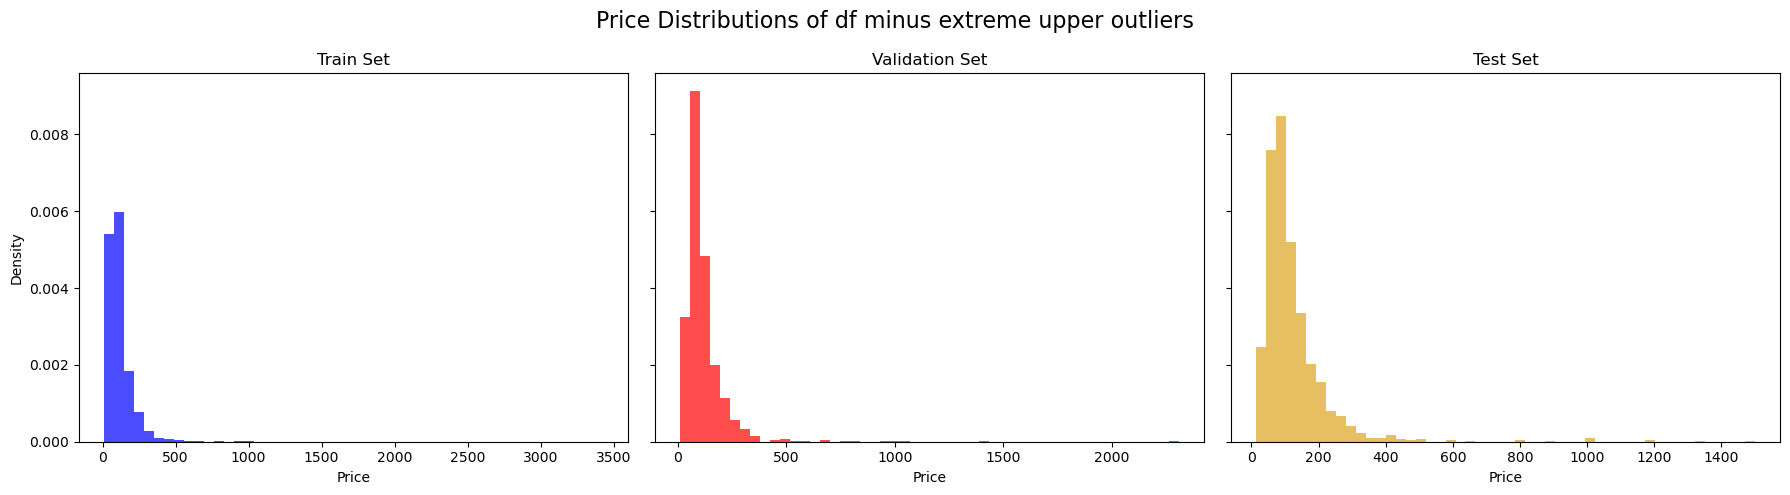

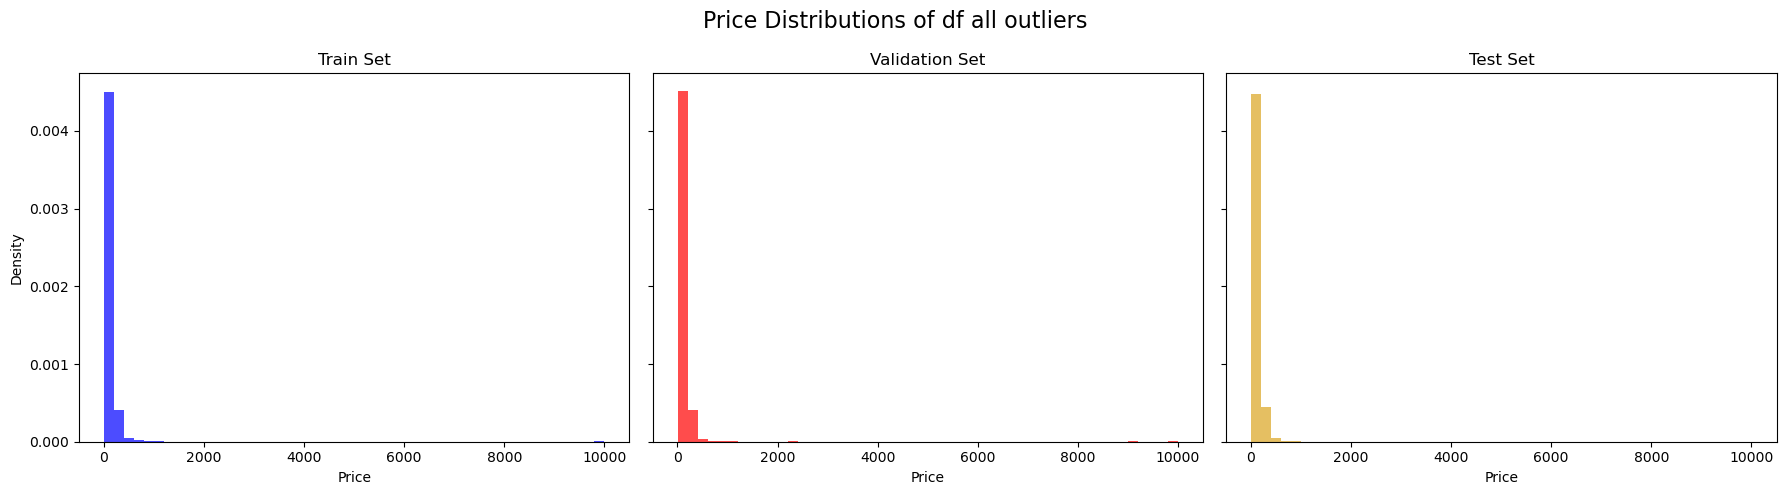

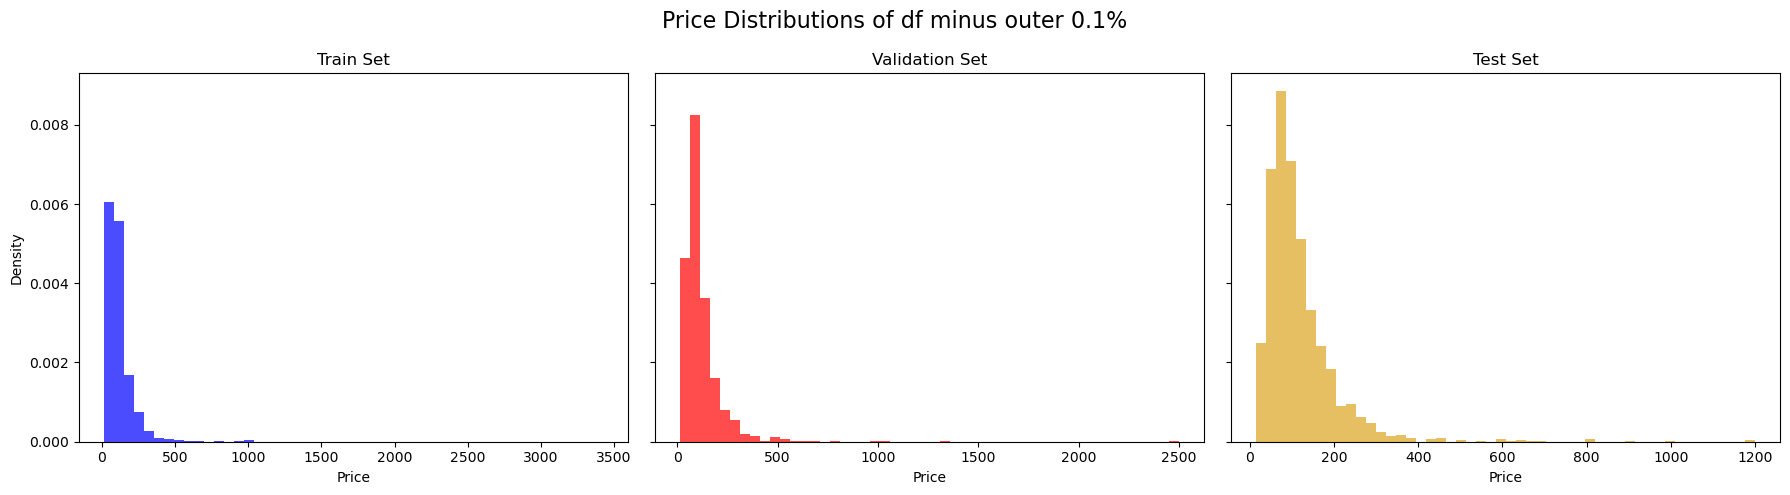

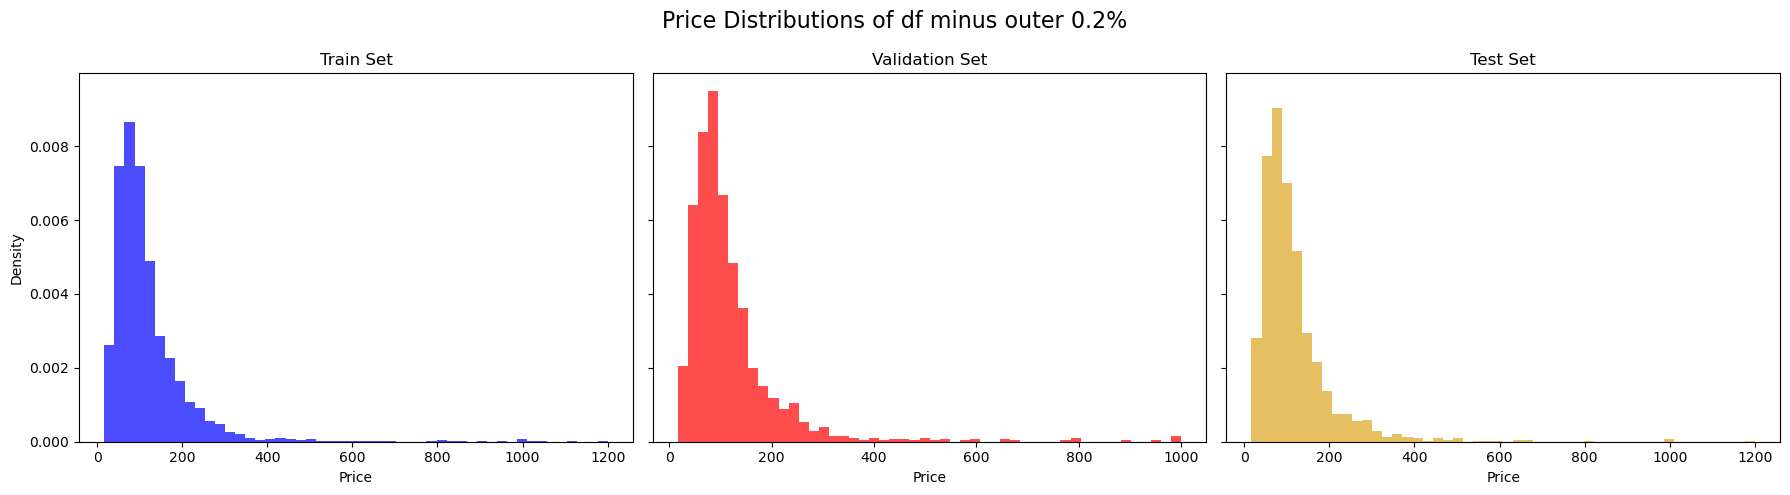

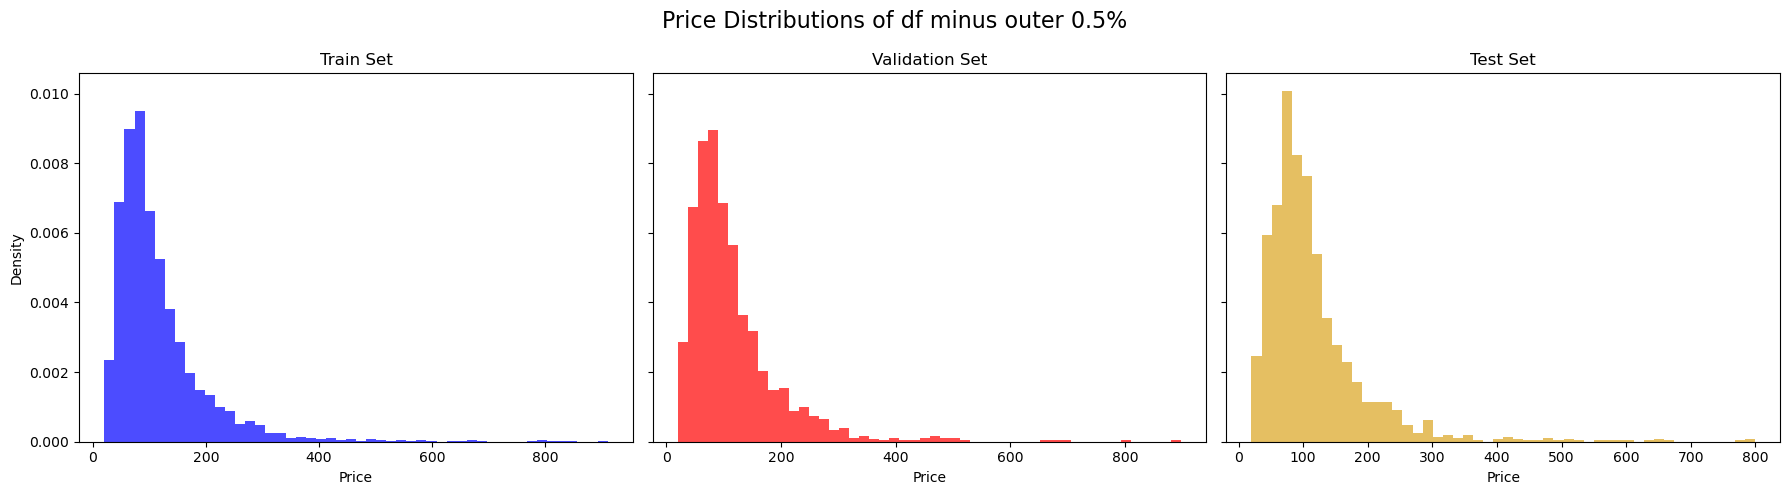

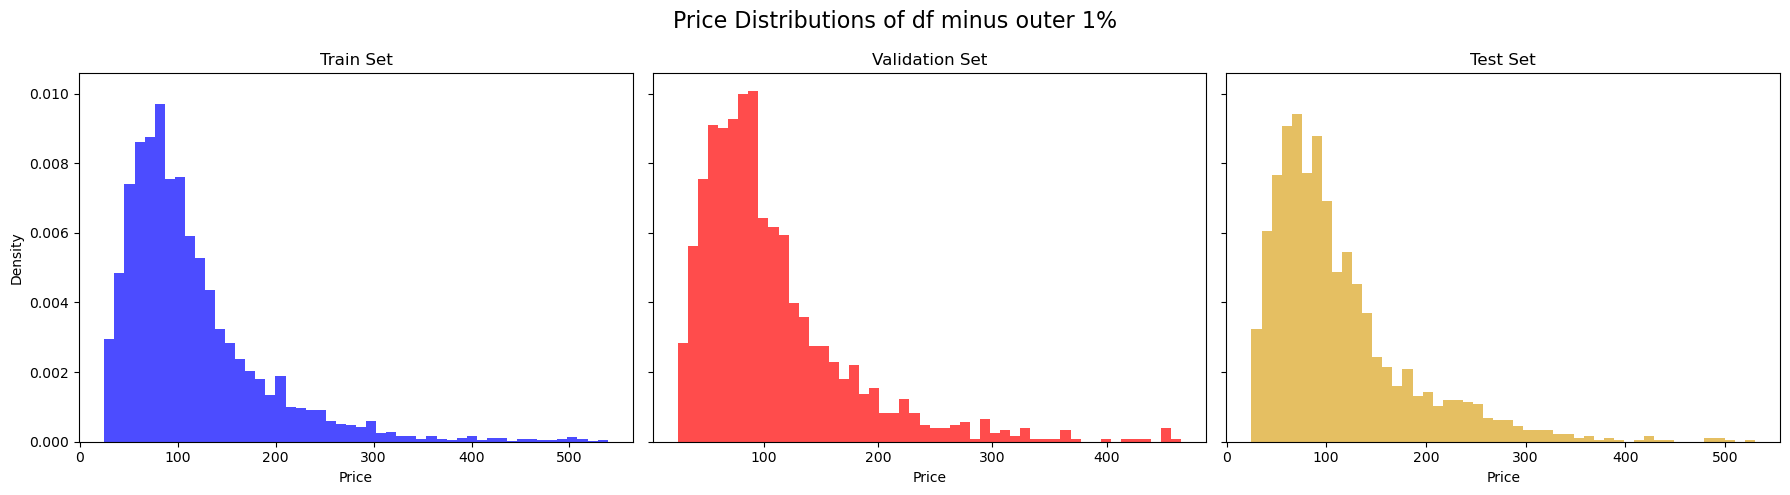

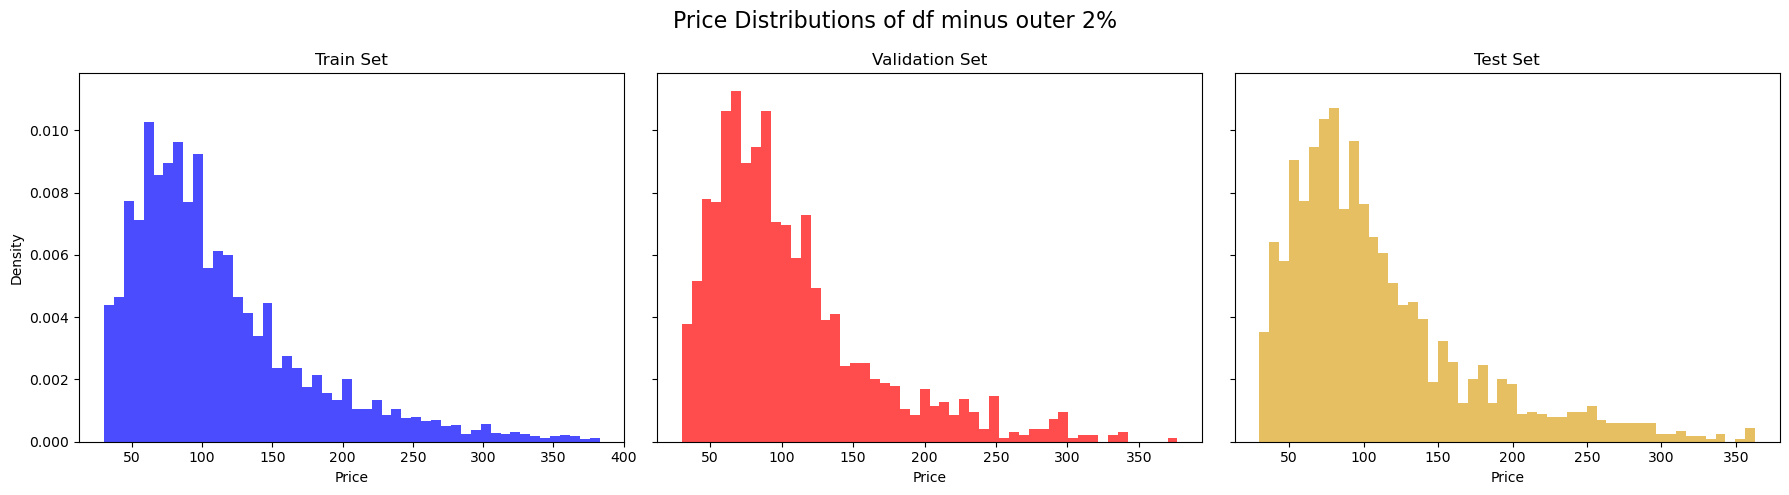

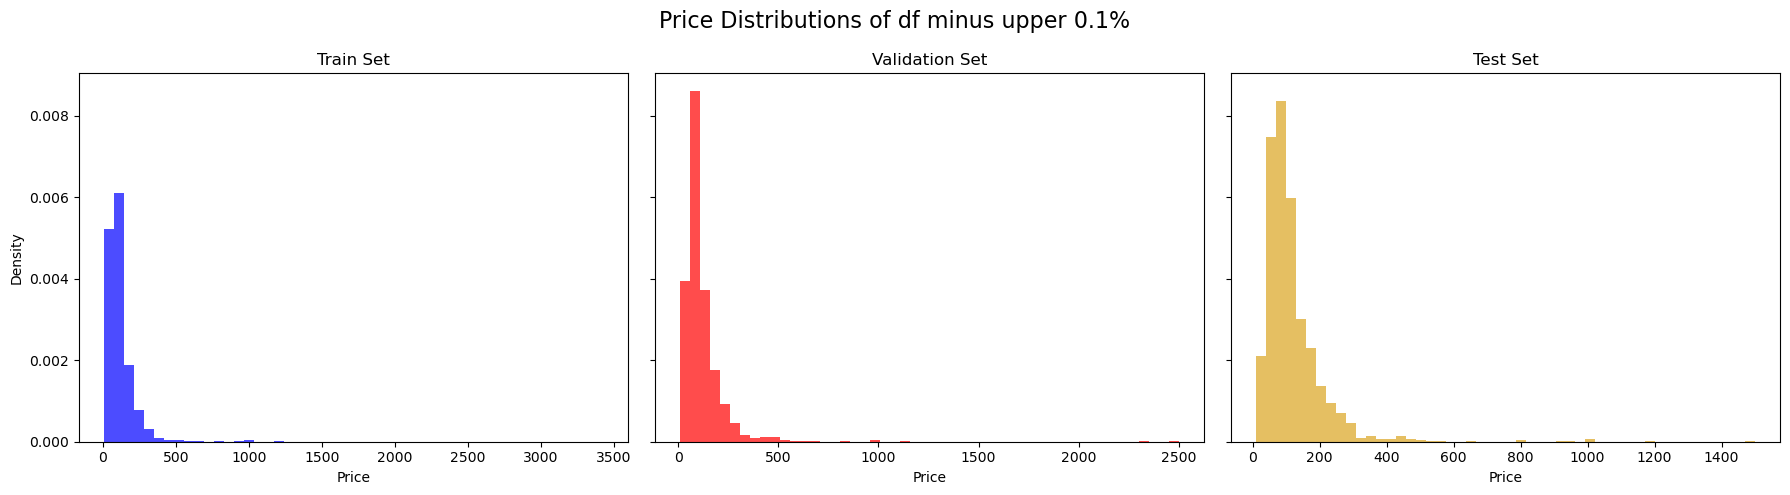

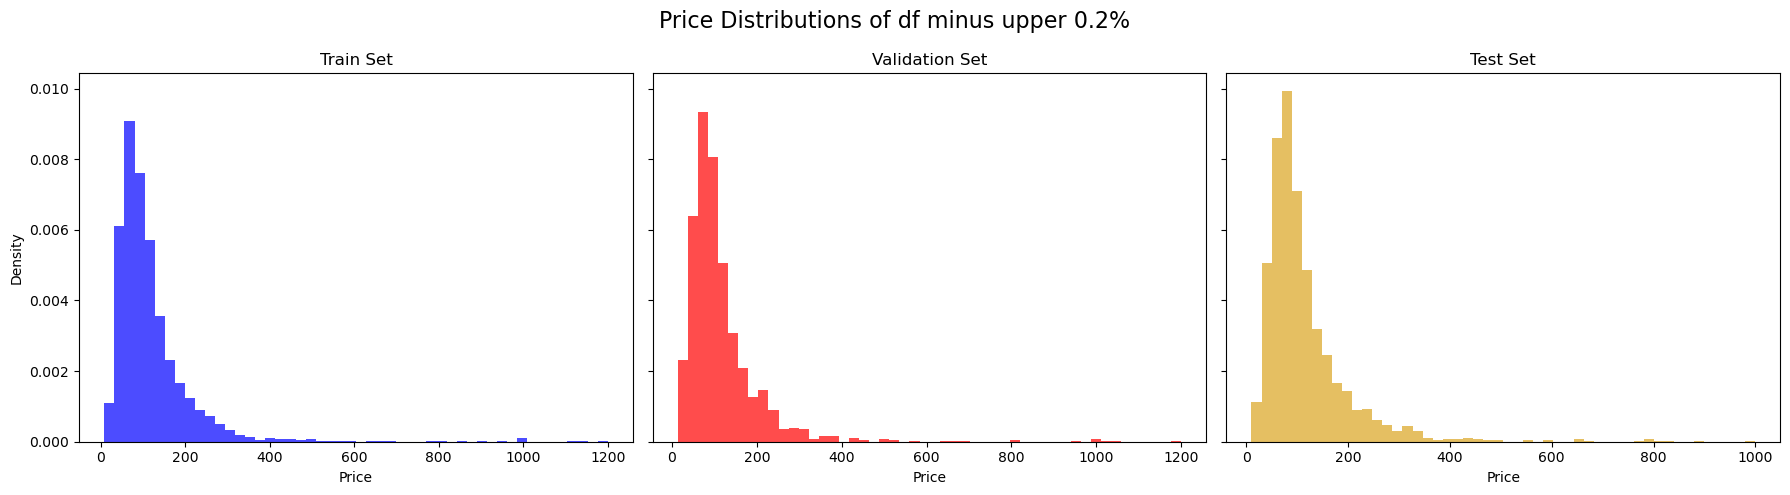

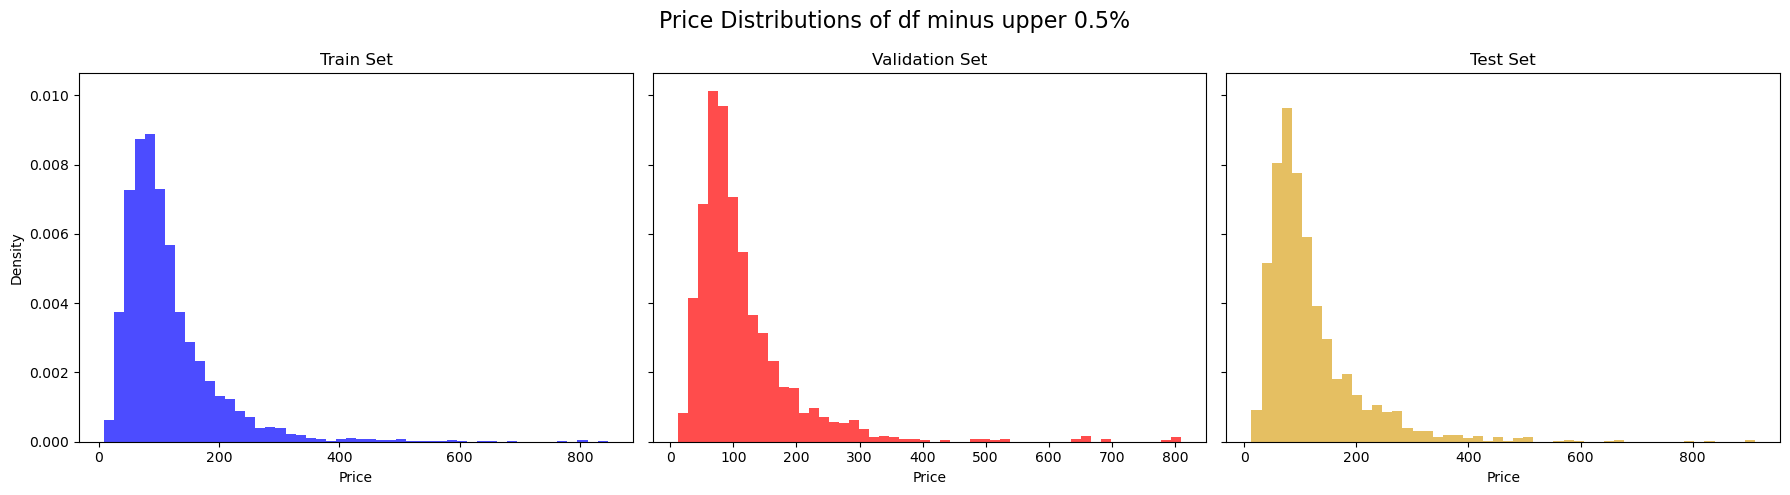

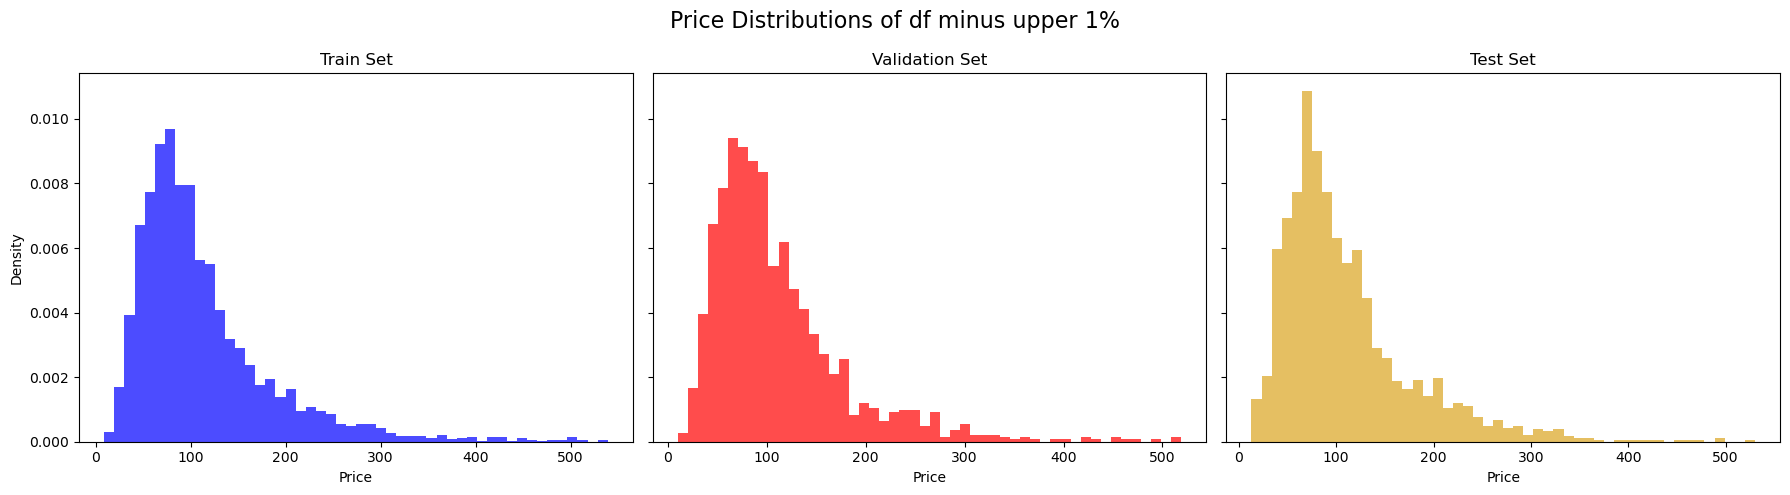

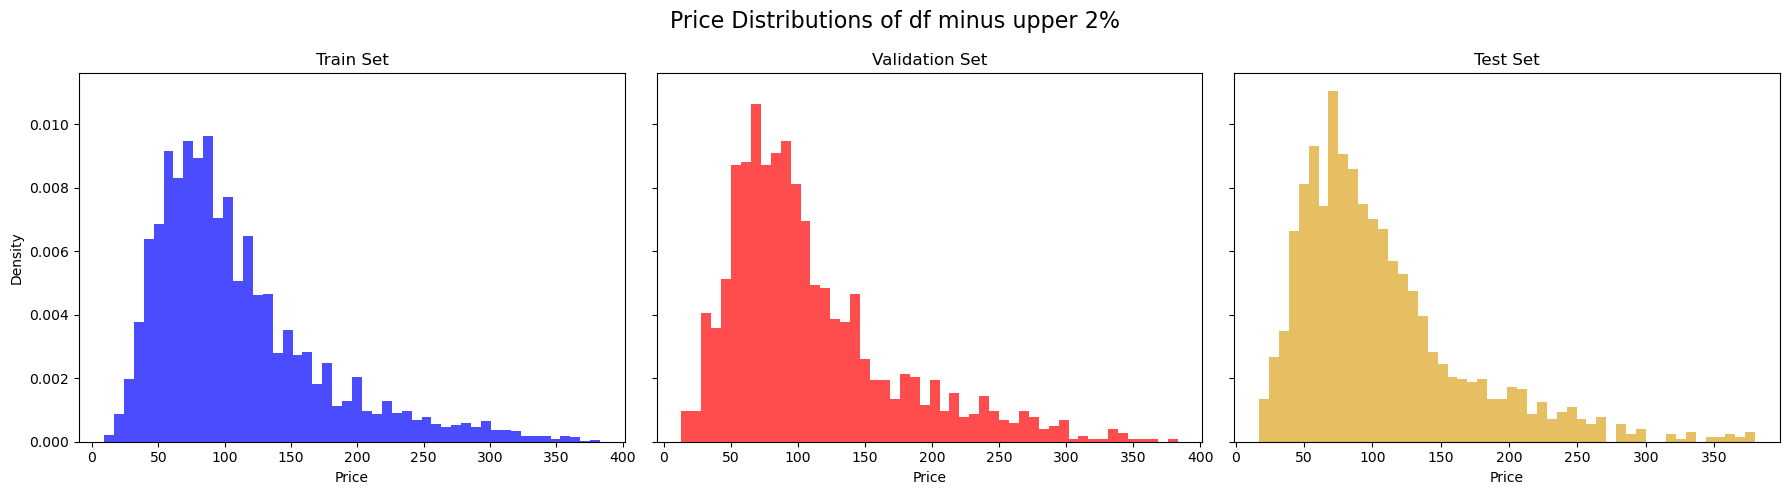

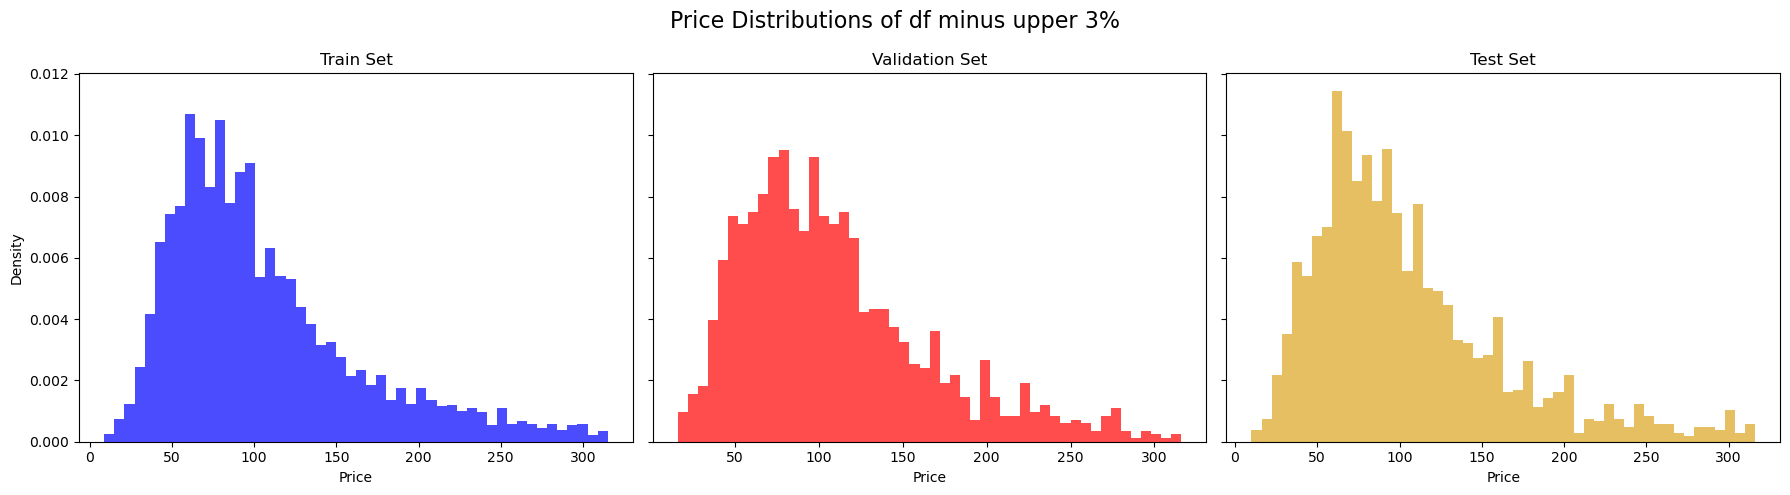

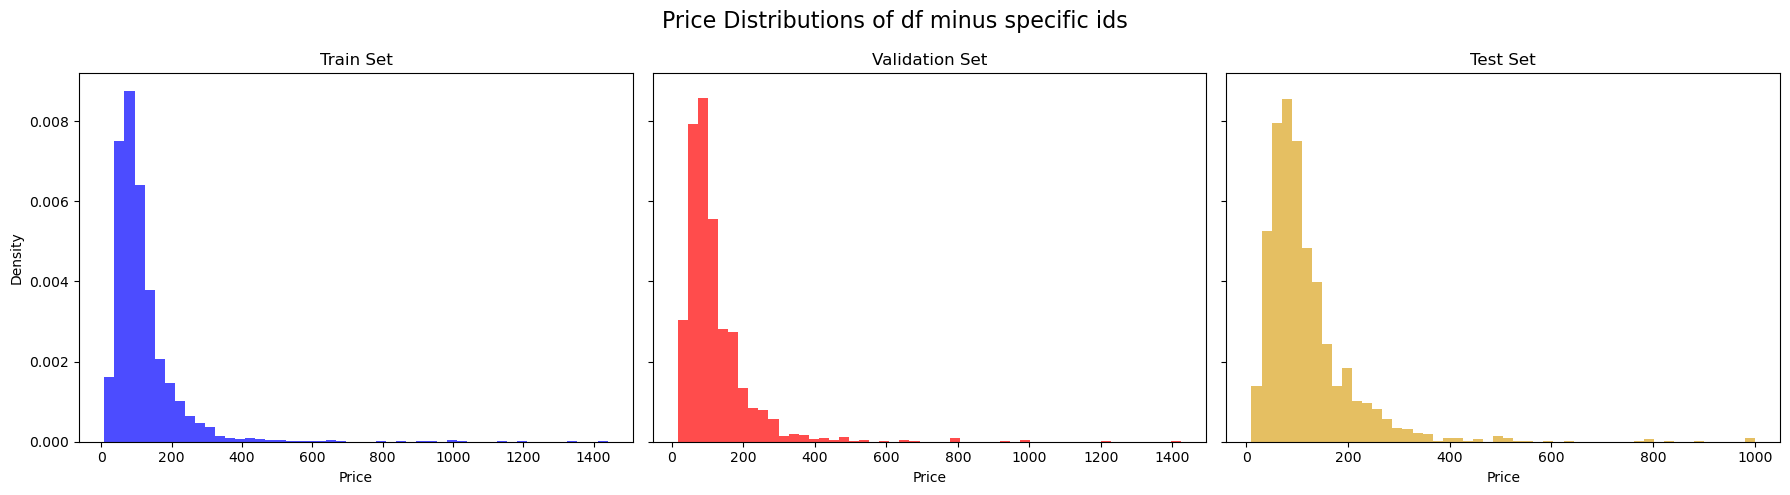

In [13]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    _, y_train, _, y_validation, _, y_test = tuple
    # Creat 1 by 3 plot (train + val + test)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Create individual histograms
    axes[0].hist(y_train, bins = 50, alpha = 0.7, color = "blue", density = True)
    axes[0].set_title("Train Set")
    axes[0].set_xlabel("Price")

    axes[1].hist(y_validation, bins = 50, alpha = 0.7, color = "red", density = True)
    axes[1].set_title("Validation Set")
    axes[1].set_xlabel("Price")

    axes[2].hist(y_test, bins = 50, alpha = 0.7, color = "goldenrod", density = True)
    axes[2].set_title("Test Set")
    axes[2].set_xlabel("Price")

    fig.suptitle(f"Price Distributions of df {dataframe_name_list[name_index]}", fontsize=16)
    axes[0].set_ylabel('Density')
    name_index += 1

    plt.tight_layout()
    plt.show()

<div style="font-size: 1.2em; font-weight: 500;">
To be able to work with a dataset with a reasonable price distribution, it seems to be a good idea to exclude the upper 1% or 2% of data, since for anything less than that, performance of most models will probably suffer due to scarce data on the high end of prices. Cutting more than the upper 2-3% will on the hand very likely decrease performance on real unfiltered data by too much and also reduce the usable range of the generated modell, meaning it is usefull only for a smaller listing price range.
</div>

<div style="font-size: 1.2em; font-weight: 500;">
Excluding "outliers" on the lower end does for now not seem very necessary. This is also because the lowest price of 9 currency units per night still can be a realistic price, as opposed to some of the higher end prices at over 9000.
</div>

In [14]:
relevant_dataframe_indices = [
    0, # minus extreme upper outliers
    5, # minus outer 1%
    9, 10, 11, 12, # minus upper 0.5%, 1%, 2%, 3%
    13
]

## Ridge regression

### Plot global behaviour over different ridge parameters alpha

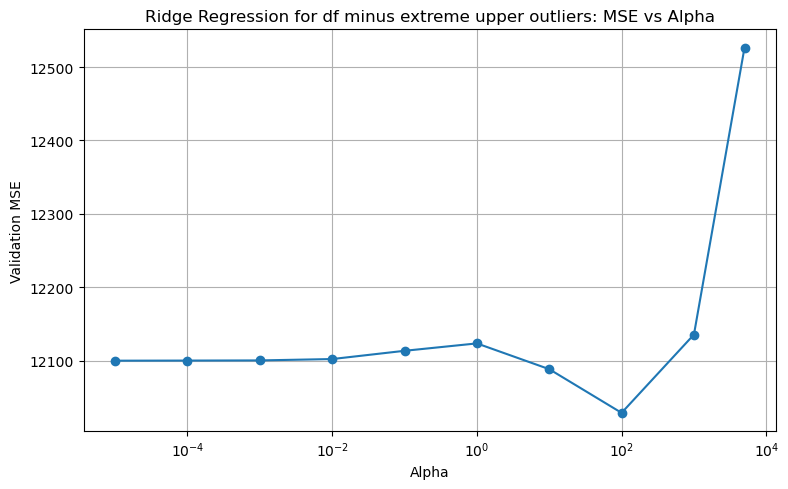

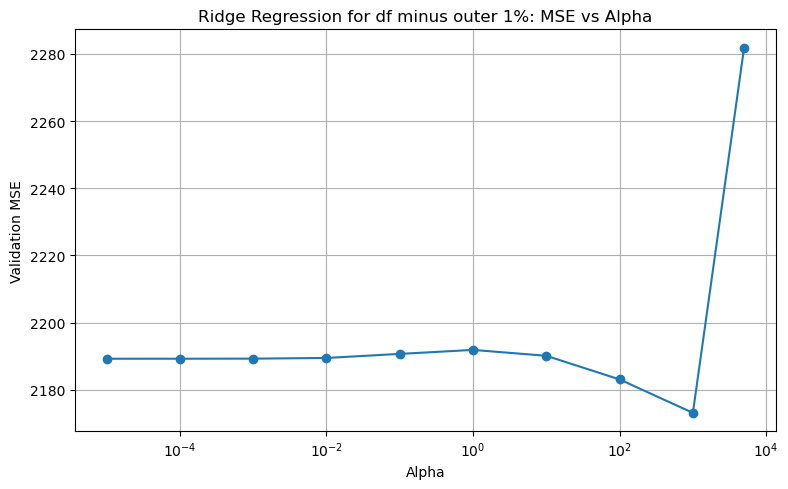

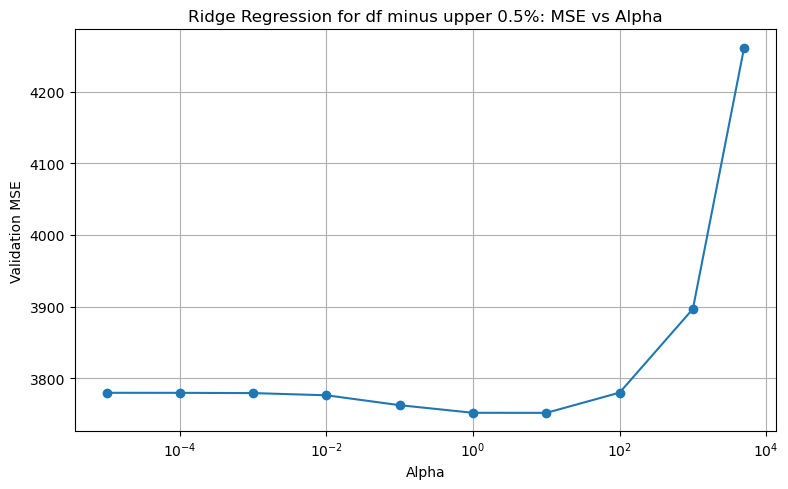

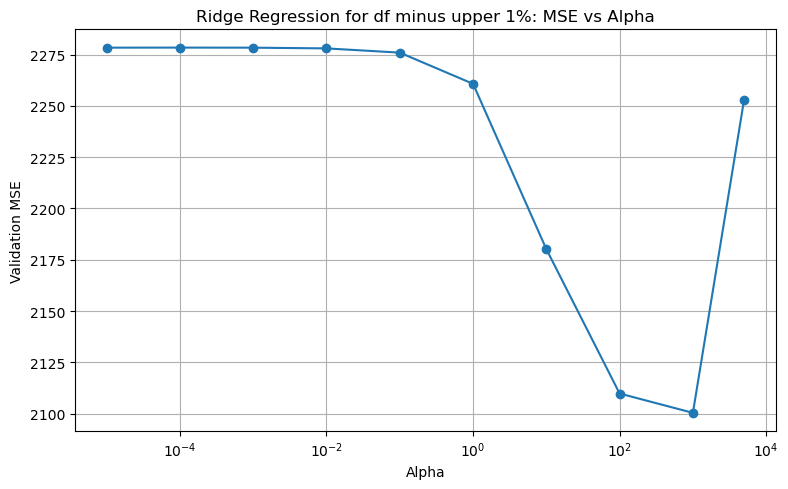

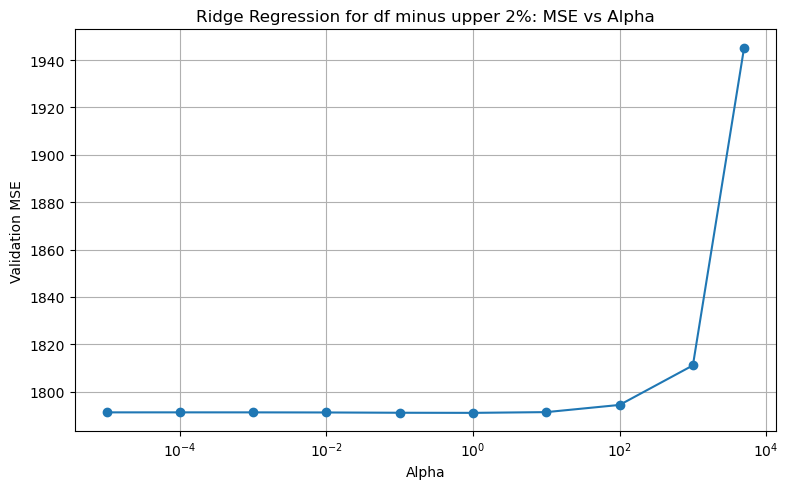

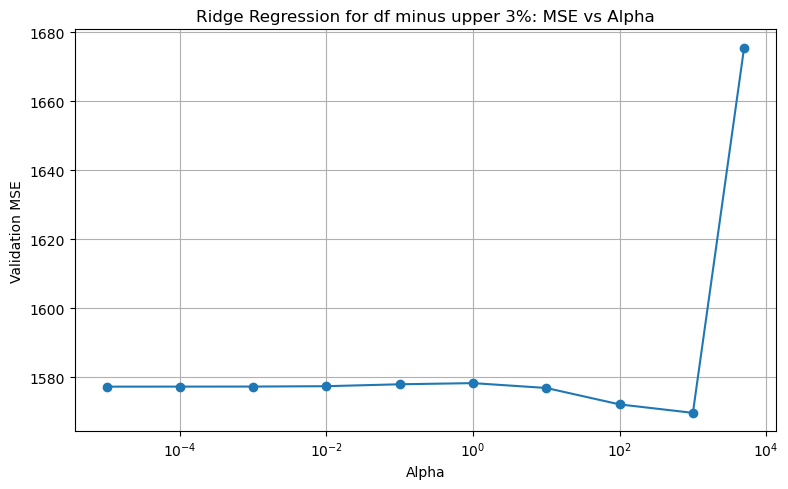

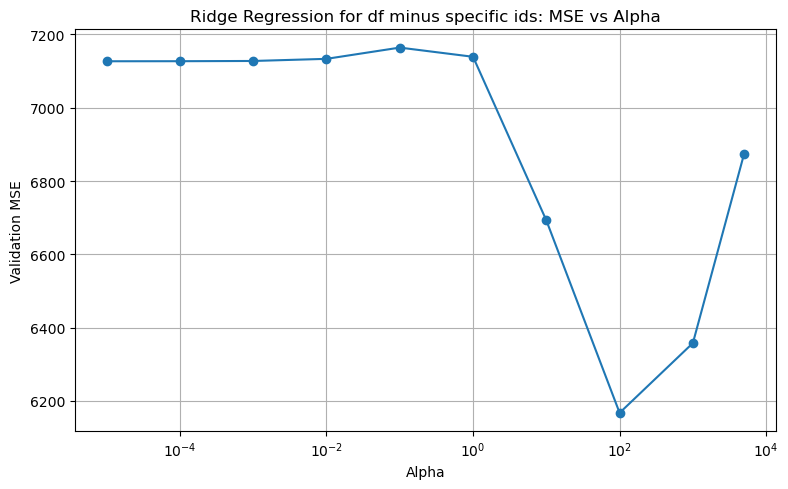

In [15]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    
    # Skip modelling and plotting for datasets that were deemed not relevant
    if name_index not in relevant_dataframe_indices:
        name_index += 1
        continue
    
    X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test = tuple
    
    # Print price range of plotted dataframe (for checking that the indices and names are all correct)
    #print(f"Price range for following plot is: {y_train.min():.0f} - {y_train.max():.0f}")

    # List of alphas to try
    alphas = [
        #0.0, 
        #0.0000000000001,
        #0.0000001, 
        #0.000001, # less alpha than this -> less MSE, but often never less than the global max at around alpha = 1-1000
        0.00001,
        0.0001,
        0.001, 
        0.01, 
        0.1, 
        1.0, 
        10.0, 
        100.0, 
        1000.0,
        5000.0
    ]

    ridge_mse_results = []
    
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_validation_scaled)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_validation, y_val_pred)

        ridge_mse_results.append((alpha, mse_train, mse_val))

    # Plot the results
    alphas_plot, _, mses_plot = zip(*ridge_mse_results)  # Unpack tuples

    plt.figure(figsize=(8, 5))
    plt.plot(alphas_plot, mses_plot, marker = "o")
    plt.xscale("log")  # Log scale for better visualization
    #plt.yscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Validation MSE")
    plt.title(f"Ridge Regression for df {dataframe_name_list[name_index]}: MSE vs Alpha")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    name_index += 1

### Plot closer around global minimum of MSE

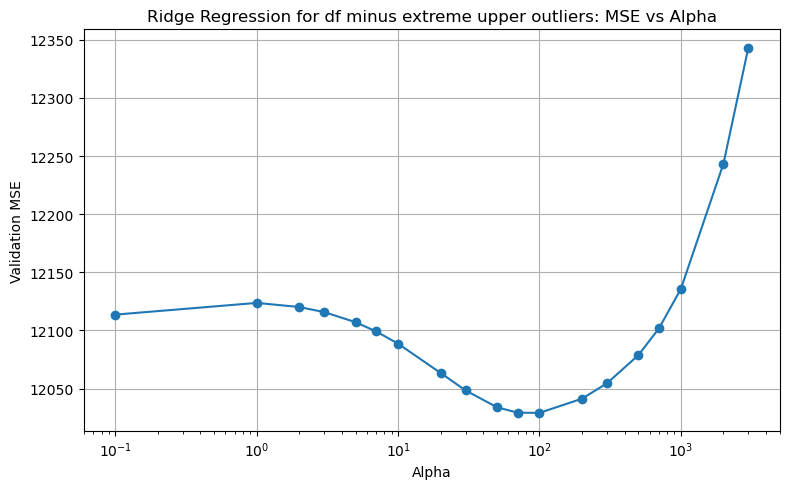

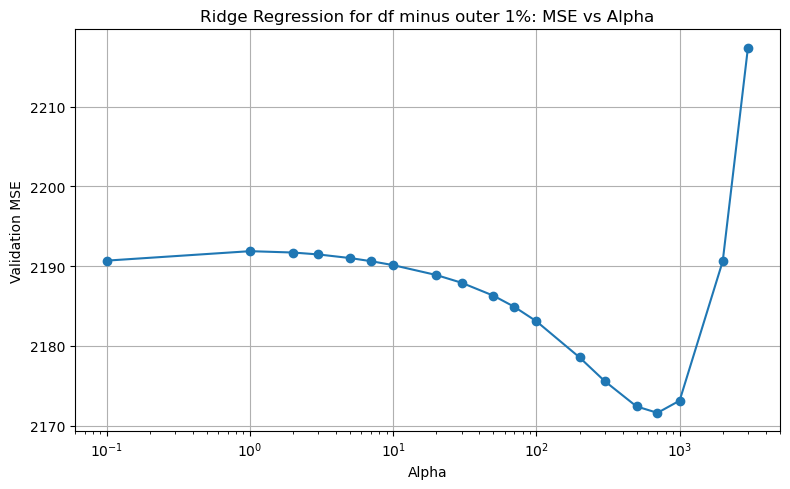

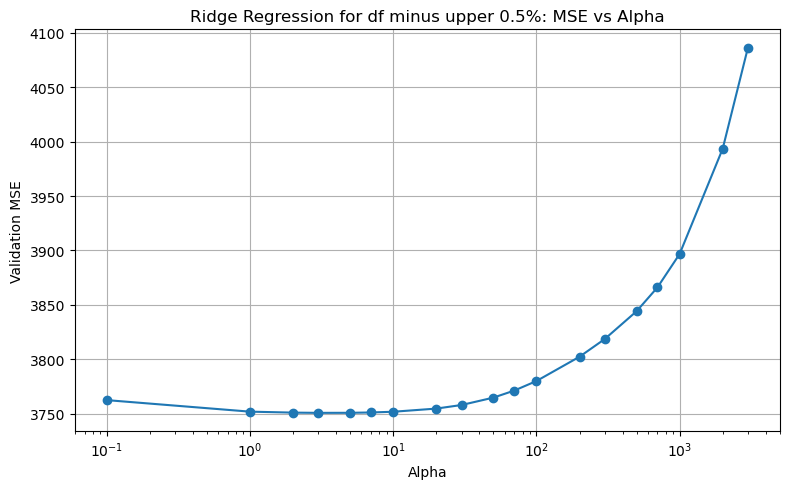

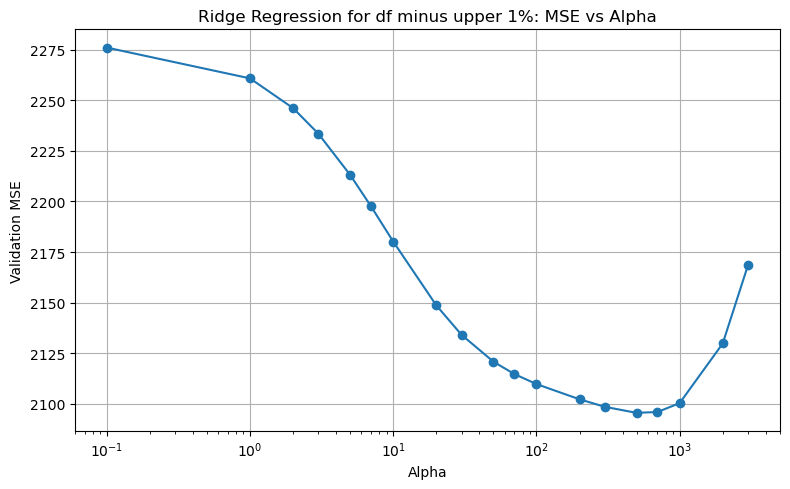

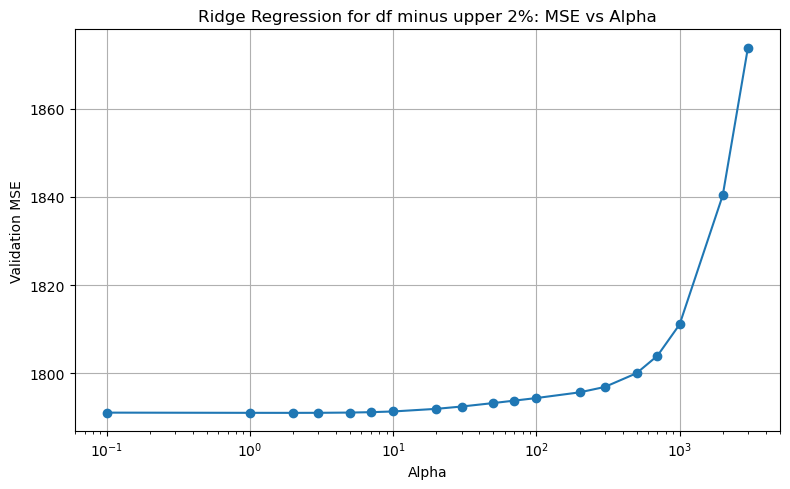

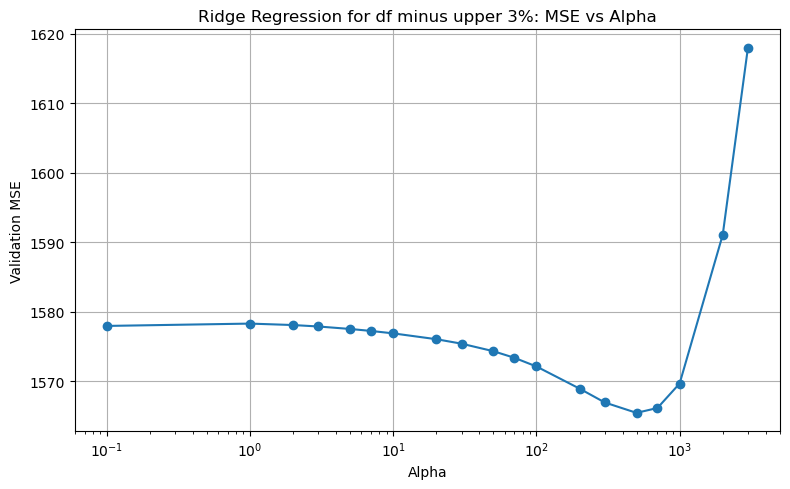

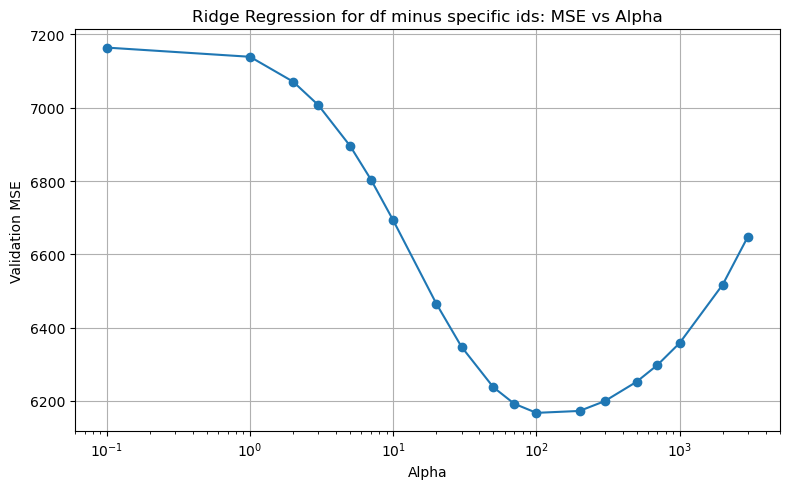

In [16]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    
    # Skip modelling and plotting for datasets that were deemed not relevant
    if name_index not in relevant_dataframe_indices:
        name_index += 1
        continue 
    
    X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test = tuple

    # List of alphas to try
    alphas = [        
        0.1,
        1.0,
        2.0,
        3.0,
        5.0,
        7.0,
        10.0,
        20.0,
        30.0,
        50.0,
        70.0,
        100.0,
        200.0,
        300.0,
        500.0,
        700.0,
        1000.0,
        2000.0,
        3000.0
    ]

    ridge_mse_results = []
    
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_validation_scaled)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_validation, y_val_pred)

        ridge_mse_results.append((alpha, mse_train, mse_val))

    # Plot the results
    alphas_plot, _, mses_plot = zip(*ridge_mse_results)  # Unpack tuples

    plt.figure(figsize=(8, 5))
    plt.plot(alphas_plot, mses_plot, marker = "o")
    plt.xscale("log")  # Log scale for better visualization
    #plt.yscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Validation MSE")
    plt.title(f"Ridge Regression for df {dataframe_name_list[name_index]}: MSE vs Alpha")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    name_index += 1

### More precise graph for df with minus upper 2% (for better visualization of minimum)

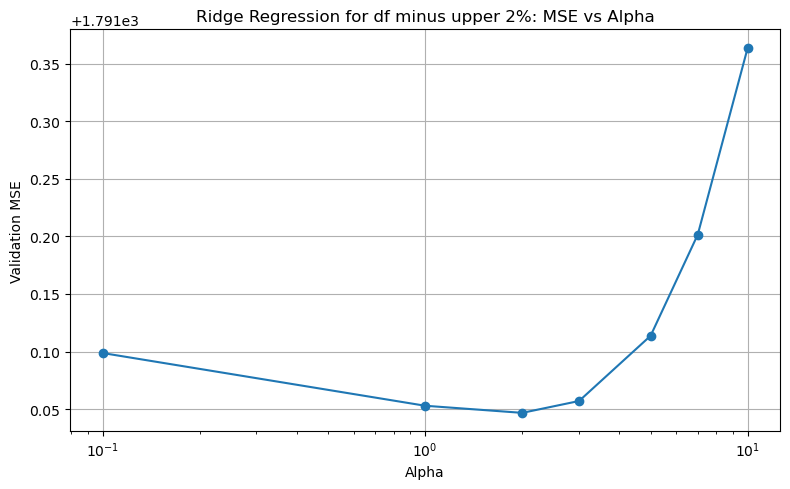

In [17]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    
    # Skip modelling and plotting for datasets are not the minus upper 2% dataset
    if name_index != 11 :
        name_index += 1
        continue 
    
    X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test = tuple

    # List of alphas to try
    alphas = [        
        0.1,
        1.0,
        2.0,
        3.0,
        5.0,
        7.0,
        10.0,
        #20.0,
    ]

    ridge_mse_results = []
    
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_validation_scaled)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_validation, y_val_pred)

        ridge_mse_results.append((alpha, mse_train, mse_val))

    """
    # Print all results
    print(f"Ridge Regression validation mse for df {dataframe_name_list[name_index]}: ")
    name_index += 1
    for alpha, _, mse_val in ridge_mse_results:
        print(f"Alpha: {alpha:.7f} -> MSE: {mse_val:.2f}")
    """

    # Plot the results
    alphas_plot, _, mses_plot = zip(*ridge_mse_results)  # Unpack tuples

    plt.figure(figsize=(8, 5))
    plt.plot(alphas_plot, mses_plot, marker = "o")
    plt.xscale("log")  # Log scale for better visualization
    #plt.yscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Validation MSE")
    plt.title(f"Ridge Regression for df {dataframe_name_list[name_index]}: MSE vs Alpha")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    name_index += 1

### More precise graph for df without specific ids (for better visualization of minimum)

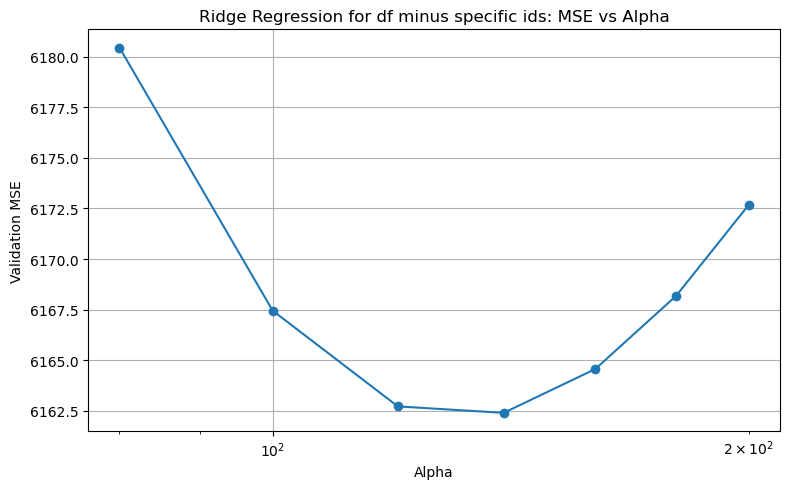

In [26]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    
    # Skip modelling and plotting for datasets are not the minus upper 2% dataset
    if name_index != 13 :
        name_index += 1
        continue 
    
    X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test = tuple

    # List of alphas to try
    alphas = [        
        80.0,
        100.0,
        120.0,
        140.0,
        160.0,
        180.0,
        200.0
    ]

    ridge_mse_results = []
    
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_validation_scaled)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_validation, y_val_pred)

        ridge_mse_results.append((alpha, mse_train, mse_val))

    """
    # Print all results
    print(f"Ridge Regression validation mse for df {dataframe_name_list[name_index]}: ")
    name_index += 1
    for alpha, _, mse_val in ridge_mse_results:
        print(f"Alpha: {alpha:.7f} -> MSE: {mse_val:.2f}")
    """

    # Plot the results
    alphas_plot, _, mses_plot = zip(*ridge_mse_results)  # Unpack tuples

    plt.figure(figsize=(8, 5))
    plt.plot(alphas_plot, mses_plot, marker = "o")
    plt.xscale("log")  # Log scale for better visualization
    #plt.yscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Validation MSE")
    plt.title(f"Ridge Regression for df {dataframe_name_list[name_index]}: MSE vs Alpha")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    name_index += 1

#### -> ideal alpha = 130

#### Check MSE of this dataset on test data -> see all the way below 

### Conclusion:
<div style="font-size: 1.2em; font-weight: 500;">
We can see that for optimized alphas, the ridge regression model has an MSE of (roughly rounded to 5s) <br>
12030 for df minus extreme outliers (RMSE: 110)<br>
2170 for df minus outer 1% (RMSE: 47)<br>
3750 for df minus upper 0.5% (RMSE: 61)<br>
2095 for df minus upper 1% (RMSE: 46)<br>
1790 for df minus upper 2% (RMSE: 42)<br>
1565 for df minus upper 3% (RMSE: 40)<br>
<br>
One can notice that the relative MSE reduction from 0.5% to 1% is about 44%, from 1% to 2% about 15% and from 2% to 3% about 13%. So from 1% onwards, the returns are greatly diminished.<br>
Also removing the bottom 1% in addition to the upper 1% barely boosts performance.<br>
<br>  
Therefore, moving forward, we will be excluding the upper 1% outliers preemptively from all data, as this measure seems to be the best compromise between good modell performance, while still having the modell be relevant on most (here: 99%) of the data.  
</div>

## Check MSE on test data

### More precise graph for 1p_upper

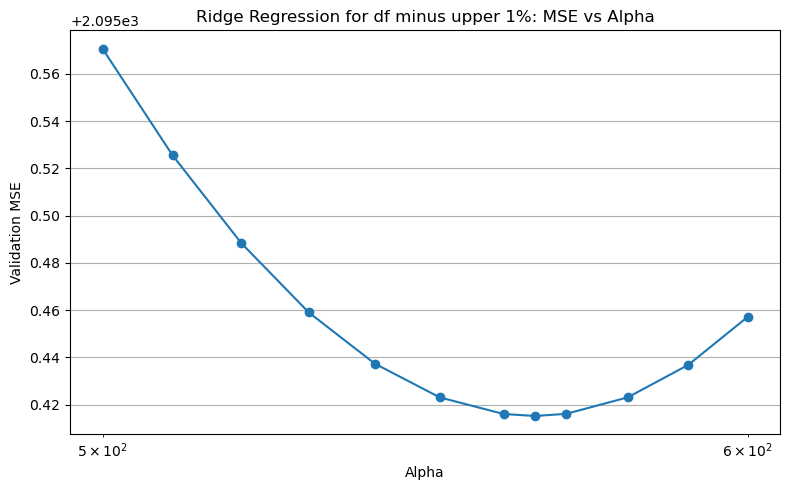

In [19]:
name_index = 0

for tuple in dataframe_ft_splits_scaled_list:
    
    # Skip modelling and plotting for datasets are not the minus upper 2% dataset
    if name_index != 10 :
        name_index += 1
        continue 
    
    X_train_scaled, y_train, X_validation_scaled, y_validation, X_test_scaled, y_test = tuple

    # List of alphas to try
    alphas = [        
        500,
        510,
        520,
        530,
        540,
        550,
        560,
        565,
        570,
        580,
        590,
        600,
    ]

    ridge_mse_results = []
    
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_validation_scaled)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_val = mean_squared_error(y_validation, y_val_pred)

        ridge_mse_results.append((alpha, mse_train, mse_val))

    """
    # Print all results
    print(f"Ridge Regression validation mse for df {dataframe_name_list[name_index]}: ")
    name_index += 1
    for alpha, _, mse_val in ridge_mse_results:
        print(f"Alpha: {alpha:.7f} -> MSE: {mse_val:.2f}")
    """

    # Plot the results
    alphas_plot, _, mses_plot = zip(*ridge_mse_results)  # Unpack tuples

    plt.figure(figsize=(8, 5))
    plt.plot(alphas_plot, mses_plot, marker = "o")
    plt.xscale("log")  # Log scale for better visualization
    #plt.yscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Validation MSE")
    plt.title(f"Ridge Regression for df {dataframe_name_list[name_index]}: MSE vs Alpha")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    name_index += 1

#### -> alpha = 565 is ideal

In [35]:
# Set dataframe as 1p_upper (minus upper 1% of price outliers)
dataframe = dataframe_list[10] # 1p_upper dataframe

# Split data into train and test blocks
random_state = 42

df_train, df_test = train_test_split(dataframe, test_size = 0.2, random_state = random_state, shuffle = True)

# Split into features and target
X_train, y_train, _, _, X_test, y_test = split_dataframe_Xy(df_train, df_train, df_test)

In [36]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 565) # ideal alpha from testing above
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

MSE: 2047.84
RMSE: 45.25


## MSE for listings_1p_upper: 2048. The RMSE is 45

### Also test this modells performance on test set WITH outliers (but still extreme outliers excluded)

In [37]:
# Set dataframe as "minus extreme outliers"
dataframe = dataframe_list[0]

# Split data into train and test blocks
random_state = 42

df_train, df_test = train_test_split(dataframe, test_size = 0.2, random_state = random_state, shuffle = True)

# Split into features and target
_, _ , _, _, X_test, y_test = split_dataframe_Xy(df_train, df_train, df_test)

#### Note: some information leak, since new split of "minus extreme outliers" might be shuffeled differently, since some rows were not removed compared to 1p_upper -> resulting MSE is only for a rough comparison

In [38]:
# Scale test feature data of dataset with only extreme outliers removed (scaled based on 1p_upper train set)
X_test_scaled = scaler.transform(X_test)

# Predict
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

MSE: 8030.22
RMSE: 89.61


### Also check ridge regression for dataframe "minus specific ids"

In [30]:
# Set dataframe as minus specific ids (listings_specific.csv)
dataframe = dataframe_list[13] # minus specific ids - dataframe

# Split data into train and test blocks
random_state = 42

df_train, df_test = train_test_split(dataframe, test_size = 0.2, random_state = random_state, shuffle = True)

# Split into features and target
X_train, y_train, _, _, X_test, y_test = split_dataframe_Xy(df_train, df_train, df_test)

In [31]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 130) # ideal alpha from testing above
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

MSE: 4305.45
RMSE: 65.62


## MSE for listings_specific: 4305. The RMSE is 65.5